# 1 模型评估的概念和方法

## 1.1 过拟合与欠拟合

### 获取并绘制数据集


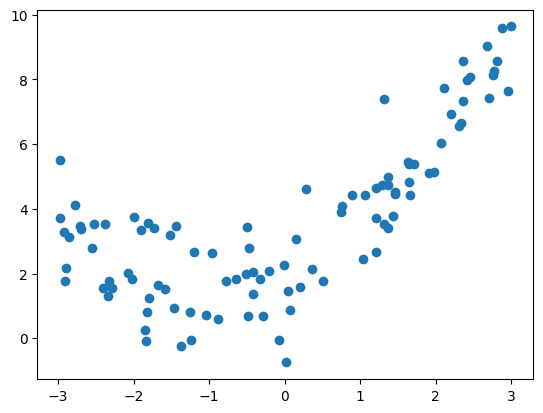

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

- `np.random.seed(666)`：设置随机数种子，这样可以确保每次运行代码时生成的随机数是一致的,仅是为了使随机结果可重现，它不直接与散点图有关。。


- `x = np.random.uniform(-3.0, 3.0, size=100)`：生成一个包含100个在-3.0到3.0之间均匀分布的随机数的一维数组。


- `X = x.reshape(-1, 1)`：将一维数组 `x` 转换（重塑reshape）为二维数组 `X`，其中一列是 `x` 的值，行数自动计算以匹配原始数据的维度。`reshape(-1, 1)` 的作用是将一维数组 x 转换为一个二维数组 X，其中 -1 表示自动计算该维度的大小，而 1 表示要创建的数组的列数为1。


- `y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)`：根据给定的二次函数关系生成 `y` 值，并添加均值为0，标准差为1的正态分布随机噪声。`np.random.normal(0, 1, size=100)` 是用于生成服从正态分布（高斯分布）的随机数的 NumPy 函数。

    - `0`：表示正态分布的均值（mean）为0，即随机数的平均值为0。
    - `1`：表示正态分布的标准差（standard deviation）为1，即随机数的离散程度。
    - `size=100`：表示要生成的随机数的数量为100。

    这个函数将生成一个包含100个元素的一维数组，其中的每个元素都是从均值为0、标准差为1的正态分布中抽取的随机数。在本例中，这些随机数表示了噪声，会被添加到二次曲线的计算结果中，用于在原始数据上引入一些随机性和波动。

    最终，通过 `y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)` 这行代码，我们将按照二次函数关系生成的理想曲线上加入了服从正态分布的随机噪声，得到了最终的观测数据 `y`。噪声的作用是模拟现实世界中数据的波动性和随机性，使得数据更接近真实情况。


- `plt.scatter(x, y)`：创建散点图，将 `x` 和 `y` 的值传递给 `scatter()` 函数以绘制数据点。


使用线性回归拟合数据

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

准确率为 0.495，比较低，直线拟合数据的程度较低。

### 使用均方误差判断拟合程度

In [3]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 绘制拟合结果

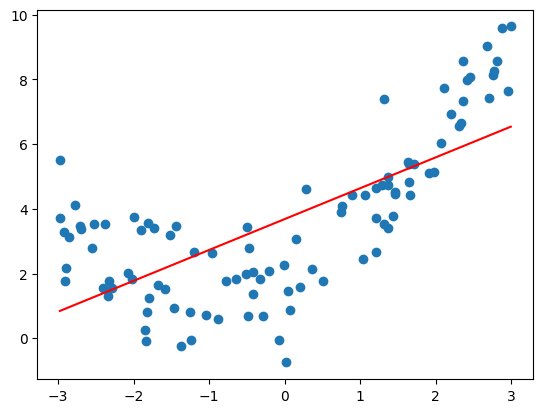

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

`plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')` 用于在图形中绘制拟合直线。

- `np.sort(x)`：将输入特征 `x` 进行升序排序，得到排序后的数组。这是因为 `x` 的顺序可能是乱序的，绘制拟合直线时需要按照从小到大的顺序连接数据点。

- `y_predict[np.argsort(x)]`：根据 `x` 的排序结果，对预测值 `y_predict` 进行重新排列。`np.argsort(x)` 返回的是 `x` 的索引按照升序排列的结果。通过使用这个索引数组对 `y_predict` 进行切片操作，可以按照相同的顺序重新排列预测值，使其与排序后的 `x` 相对应。

- `color='r'`：指定拟合直线的颜色为红色 ('r')。

将排序后的输入特征 `x` 与重新排列的预测值 `y_predict` 作为参数传递给 `plot()` 函数，绘制拟合直线。通过按照从小到大的顺序连接数据点，可以在图形中展示出线性回归模型对原始数据的拟合程度。

### 使用多项式回归拟合

* 首先封装Pipeline管道，这样便于下一步灵活调整多项式回归模型参数

In [5]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

用于创建多项式回归模型的函数。使用sklearn库中的Pipeline类来构建一个机器学习工作流程，包括多项式特征转换、标准化和线性回归模型。

- `from sklearn.pipeline import Pipeline`: Pipeline类，用于将多个数据处理步骤和机器学习模型封装在一起，形成一个流水线。



- `from sklearn.preprocessing import PolynomialFeatures`: PolynomialFeatures类，用于进行多项式特征转换。



- `from sklearn.preprocessing import StandardScaler`: StandardScaler类，用于进行特征标准化（特征缩放）。



- `def PolynomialRegression(degree)`: 定义PolynomialRegression函数，接受参数degree，表示多项式的次数。



- `return Pipeline([...])`: 使用Pipeline类创建一个机器学习工作流程并返回。Pipeline类接受一个由元组构成的列表作为参数，每个元组代表工作流程中的一个步骤。

    - `('poly', PolynomialFeatures(degree=degree))`: 多项式特征转换步骤，将输入特征转换为指定次数的多项式特征。使用PolynomialFeatures类，并将其实例命名为'poly'。

    - `('std_scaler', StandardScaler())`: 标准化步骤，对多项式特征进行特征缩放，使特征的均值为0，标准差为1。使用StandardScaler类，并将其实例命名为'std_scaler'。

    - `('lin_reg', LinearRegression())`: 线性回归模型步骤，用于拟合多项式特征和目标变量之间的关系。使用LinearRegression类，并将其实例命名为'lin_reg'。

创建一个多项式回归模型，通过使用多项式特征转换和标准化来提高模型的性能。可以根据需要选择不同的多项式次数，从而得到不同复杂度的模型。

* 使用 Pipeline 拟合数据：degree = 2

In [6]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

y2_predict = poly2_reg.predict(X)

# 比较真值和预测值的均方误差
mean_squared_error(y, y2_predict)

1.0987392142417858

* 绘制拟合结果

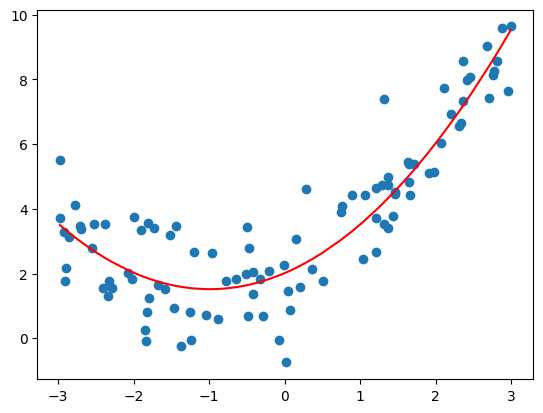

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 10

1.0508466763764126


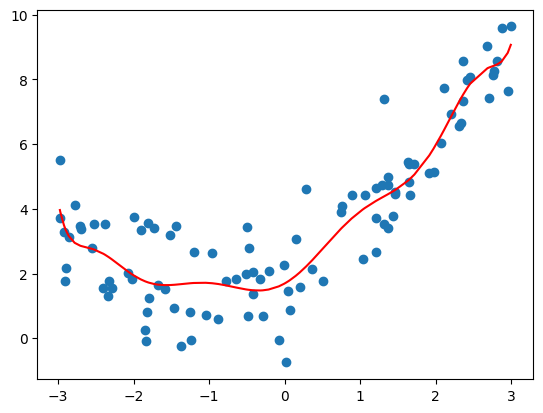

In [8]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
print(mean_squared_error(y, y10_predict))


plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 100


0.6807802342342404


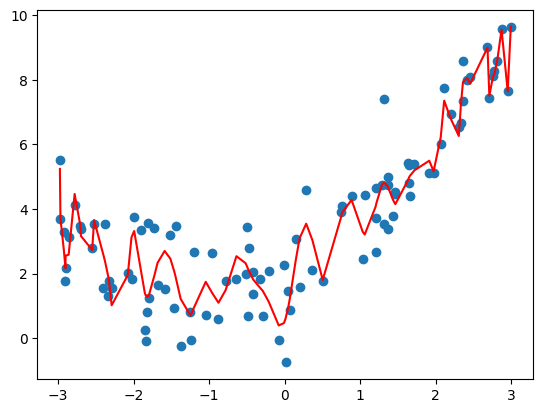

In [9]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
print(mean_squared_error(y, y100_predict))


plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

* 分析
    1. degree=2：均方误差为 1.0987392142417858；
    2. degree=10：均方误差为 1.0508466763764126；
    3. degree=100：均方误差为 0.6807802342342404；
    4. degree 越大拟合的效果越好，因为样本点是一定的，我们总能找到一条曲线将所有的样本点拟合，也就是说将所有的样本点都完全落在这根曲线上，使得整体的均方误差为 0；
    5. 红色曲线并不是所计算出的拟合曲线，而此红色曲线只是原有的数据点对应的 y 的预测值连接出来的结果，而且有的地方没有数据点，因此连接的结果和原来的曲线不一样；

## 1.2 交叉验证

### 1.2.1交叉验证迭代器

**K折交叉验证**：K-Fold Cross Validation,是将原始数据分成K组（一般是均分）,称为折叠 (fold)，然后将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样就会得到K个模型，将K个模型最终的验证集的分类准确率取平均值，作为K折交叉验证分类器的性能指标。通常设置K大于或等于3。

![](./img/05_1.png)



**K折重复多次**： RepeatedKFold 重复 K-Fold n 次。当需要运行时可以使用它 KFold n 次，在每次重复中产生不同的分割。

**留一交叉验证**： LeaveOneOut (或 LOO) 是一个简单的交叉验证。每个训练集都由除了一个样本以外的其余所有样本组成的，留下的一个样本组成检验集。 这样，对于 n 个样本，我们有 n 个不同的训练集和 n 个不同的测试集。因此LOO-CV会得到N个模型，用N个模型最终的验证集的分类准确率的平均数作为分类器的性能指标。这种交叉验证程序不会浪费太多数据，因为只有一个样本是从训练集中删除掉的。

![](./img/05_2.png)


**留P交叉验证**： LeavePOut 与 LeaveOneOut 非常相似，因为它通过从整个集合中删除 p 个样本来创建所有可能的训练/测试集。对于 n 个样本，这产生了 (n,p) 个 训练-测试对。与 LeaveOneOut 和 KFold 不同，当 p > 1 时，测试集会重叠。

**用户自定义数据集划分： ShuffleSplit** 迭代器将会生成一个用户给定数量的独立的训练/测试数据划分。样例首先被打散然后划分为一对训练测试集合。

**设置每次生成的随机数相同**： 可以通过设定明确的 random_state ，使得伪随机生成器的结果可以重复。

### 1.2.2基于类标签、具有分层的交叉验证迭代器

如何解决样本不平衡问题？ 使用StratifiedKFold和StratifiedShuffleSplit 分层抽样。 一些分类问题在目标类别的分布上可能表现出很大的不平衡性：例如，可能会出现比正样本多数倍的负样本。在这种情况下，建议采用如 StratifiedKFold 和 StratifiedShuffleSplit 中实现的分层抽样方法，确保相应的类别频率在每个训练和验证的折叠中大致得以保留。

**StratifiedKFold**是 k-fold 的变种，会返回 stratified（分层） 的折叠：每个小集合中，各个类别的样例比例大致和完整数据集中相同。

**StratifiedShuffleSplit**是 ShuffleSplit 的一个变种，会返回直接的划分，比如：创建一个划分，但是划分中每个类的比例和完整数据集中的相同。

### 1.2.3用于分组数据的交叉验证迭代器

如何进一步测试模型的泛化能力？ 留出一组特定的不属于测试集和训练集的数据。有时我们想知道在一组特定的 groups 上训练的模型是否能很好地适用于看不见的新数据。为了衡量这一点，我们需要确保验证对象中的所有样本均未在配对训练折叠中出现过，采用的办法就是留出一组特定的不属于测试集和训练集的数据，常用的方法包括GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit.

**GroupKFold**是 k-fold 的变体，它确保同一个 group 在测试和训练集中都不被表示。 例如，如果数据是从不同的组获得的，每个组又有多个样本，并且如果模型足够灵活，能高度从指定的特征中学习，则可能存在很好地拟合训练的组，但不能很好地预测不存在于训练组中的样本，GroupKFold 可以检测到这种过拟合的情况。

**LeaveOneGroupOut**是一个交叉验证方案，它根据用户提供的 array of integer groups （整数组的数组）来区别不同的组，以此来提供样本。这个组信息可以用来编码任意域特定的预定义交叉验证折叠。每个训练集都是由除特定组别以外的所有样本构成的。

**LeavePGroupsOut**类似于 LeaveOneGroupOut ，但为每个训练/测试集删除与 P 组有关的样本。

**GroupShuffleSplit**迭代器是 ShuffleSplit 和 LeavePGroupsOut 的组合，它生成一个随机划分分区的序列，其中为每个分组提供了一个组子集。

### 1.2.4 时间序列分割

**TimeSeriesSplit** 也是K-Fold的一个变种，首先返回K折作为训练数据集，把K+1折作为测试数据集。请注意，与标准的交叉验证方法不同，有关时间序列的样本切分必须保证时间上的顺序性，不能用未来的数据去验证现在数据的正确性，只能使用时间上之前一段的数据建模，而用后一段时间的数据来验证模型预测的效果，这也是时间序列数据在做模型验证划分数据时与其他常规数据切分的区别。


In [10]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)

# ===================================数据集划分,训练模型==========================
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # 使用训练集训练模型
print('准确率：',clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）


#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed, y_train) # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# ===================================直接调用交叉验证评估模型==========================
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# ===================================多种度量结果======================================
scoring = ['precision_macro', 'recall_macro'] # precision_macro为精度（准确率），recall_macro为召回率
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）


# ==================================K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证==========================================
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# ==================================分层K折交叉验证、分层随机交叉验证==========================================
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break


# ==================================组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split==========================================
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))


# ==================================时间序列分割==========================================
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0., 0., 0., 0., 0.]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]), 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]), 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(100,) (50,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 4 5]
留一组分割：[0 1 2 3 4 5] [6 7 8 9]
留 P 组分割：[6 7 8 9] [0 1 2 3 4 5]
留 P 组分割：[3 4 

# 2 模型调参

参数可分为两类：过程影响类参数和子模型影响类参数。

## 2.1 网格搜索

Grid Search：一种穷举搜索的调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。

### 简单的网格搜索

In [11]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


## 2.2 学习曲线和验证曲线

### 2.2.1 学习曲线
通过学习曲线来绘制模型在训练集和交叉验证集上的准确率，观察模型在新数据上的表现进而判断模型的方差或偏差是否过高，以及增大训练集是否可以减小过拟合。
![](./img/05_3.png)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB # 高斯朴素贝叶斯分类器
from sklearn.svm import SVC # 支持向量机（SVM）分类器

from sklearn.datasets import load_digits # 手写数字数据集
from sklearn.model_selection import learning_curve # 绘制学习曲线
from sklearn.model_selection import ShuffleSplit # 创建随机交叉验证策略

In [13]:
# 绘制学习曲线
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 在绘图中添加网格线

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

定义 `plot_learning_curve` 的函数。该函数用于绘制学习曲线，评估模型在不同训练集大小下的性能表现。

**参数说明：**
- `estimator`：要评估的分类器或回归器对象
- `title`：图形的标题
- `X`：特征矩阵
- `y`：目标变量
- `ylim`：y轴上的取值范围
- `cv`：交叉验证策略对象，默认为`None`
- `n_jobs`：并行处理的工作进程数，默认为1
- `train_sizes`：可选的训练集大小，用于绘制学习曲线，默认为 `[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]`

**函数内部的操作如下：**
1. 创建一个新的图形对象
2. 设置图形的标题和轴标签
3. 如果指定了 `ylim` 参数，则设置 y 轴上的取值范围
4. 调用 `learning_curve` 方法计算训练集和测试集的得分 (`train_scores` 和 `test_scores`)，以及相应的均值 (`train_scores_mean` 和 `test_scores_mean`) 和标准差 (`train_scores_std` 和 `test_scores_std`)
5. 绘制学习曲线图形：使用 `fill_between` 方法绘制训练集和测试集得分的区间范围，使用 `plot` 方法绘制训练集和测试集得分的均值
6. 添加图例并显示网格线
7. 返回图形对象

**部分代码详解：**
1. ` plt.ylim(*ylim)` ：
    -  `plt.ylim` 是 Matplotlib 库中的一个函数，用于设置 y 轴上的取值范围。该函数接受两个参数，表示 y 轴的下限和上限。在上述代码中，`plt.ylim(*ylim)` 表示将传入的 `ylim` 参数解包，并将解包后得到的两个值分别作为下限和上限传递给 `plt.ylim` 函数。
    -  `*ylim` 使用了 `*` 运算符，表示将 `ylim` 参数解包。当函数调用时，如果一个参数前面有 `*`，则表示将该参数解包为多个独立的值。在这里，`*ylim` 的作用是将 `ylim` 参数解包为两个值，以便传递给 `plt.ylim` 函数。解包后的第一个值将成为下限，第二个值将成为上限。
    

2. `learning_curve` 函数


```python
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, train_sizes=None, cv=None, scoring=None, n_jobs=None, 
    shuffle=True, random_state=None, verbose=0, error_score='raise', **kwargs)
```

    参数说明： 
    
   - `estimator`: 所使用的分类或回归算法。
   - `X`: 特征矩阵。
   - `y`: 目标变量。
   - `train_sizes`: 是否自定义训练集大小，如果指定为 `None`，则默认生成 5 个等间隔的训练集大小，最小大小为 0.1，最大大小为 1，即 `train_sizes=np.linspace(0.1, 1.0, 5)`。
   - `cv`: 交叉验证策略对象，默认为 None。可以使用整数、用于指定折叠数量的交叉验证生成器，或者用于划分数据集的可迭代对象。
   - `scoring`: 模型性能评估指标，可以选择预定义的性能评估指标字符串，或者自定义的评估函数。
   - `n_jobs`: 并行处理的工作进程数，默认为 None，表示使用单个进程（如果设为 -1，则使用所有可用的CPU）。
   - `shuffle`: 每次交叉验证时，是否对训练数据顺序进行随机洗牌。
   - `random_state`: 用于生成随机数的种子，设定后可以保证每次运行都能得到相同的结果。
   - `verbose`: 控制输出信息的详细程度。
   - `error_score`: 如果某个参数设置导致模型无法有效的训练，则会产生一个错误分数。


    函数返回三个数组：

   - `train_sizes`: 训练集大小的数组。
   - `train_scores`: 每组训练集大小下模型在训练集上的得分的数组。
   - `test_scores`: 每组训练集大小下模型在测试集上的得分的数组。

3. `plt.fill_between()` 函数

用于在两条曲线之间填充颜色，可以有效地表示数据的范围或区域。常用于可视化误差范围、置信区间或数据集分布等情况。

函数的基本语法如下：
```python
plt.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, **kwargs)
```

参数说明：
- `x`：x 轴上的数据点。
- `y1`：第一条曲线的 y 值。
- `y2`：第二条曲线的 y 值，默认为 0。如果设置为数组，则会和 y1 一样长，用于填充两条曲线之间的区域。
- `where`：一个条件数组或布尔表达式，指定应该填充区域的位置。默认为 None，表示在整个 x 范围内填
[好像出错了，请稍后再试。]

<module 'matplotlib.pyplot' from 'D:\\Development\\anaconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

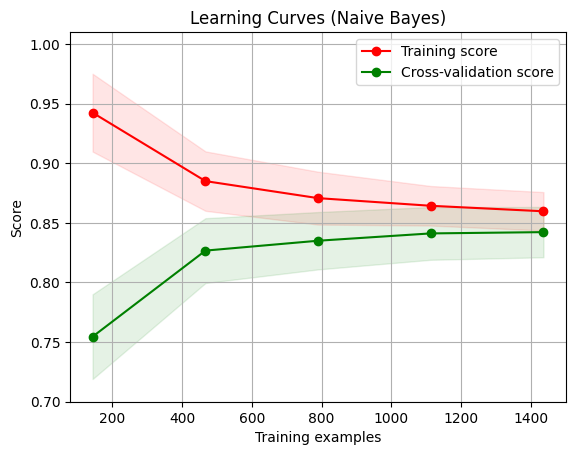

In [17]:
digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

<module 'matplotlib.pyplot' from 'D:\\Development\\anaconda3\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

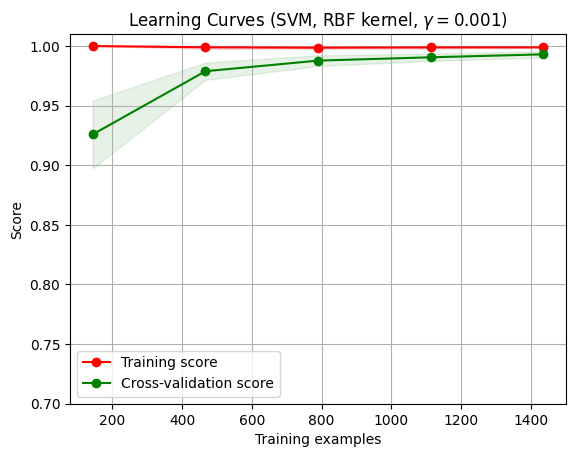

In [19]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=1)


### 2.2.2 验证曲线

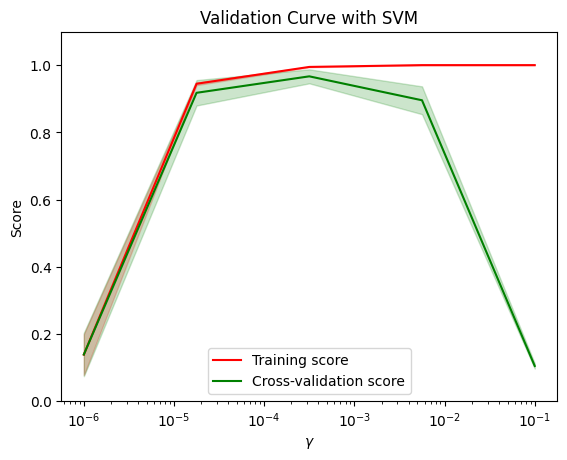

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn. model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()